![Logo_Seattle](Seattle_logo.jpg)

# **Projet 4 - <span style="color:#1d479b">Anticipez les besoins en consommation de bâtiments</span>**
---

**<span style="color:#1d479b">Objectif de la mission:</span>**
* Tenter de **prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation** pour lesquels elles n’ont pas encore été mesurées.
* **Evaluer l’intérêt de l’"ENERGY STAR Score"** pour la prédiction d’émissions.

**<span style="color:#1d479b">Source des données:</span>**

Les données sont issues du <a href="https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy">site gouvernemental de la ville de Seattle</a>. Elles sont mises à disposition afin d'effectuer une "Analyse comparative énergétique des bâtiments 2016".

**Détails contextuels:**
> Le programme d'analyse comparative et de reporting énergétique des bâtiments de Seattle (SMC 22.920) exige que les propriétaires de bâtiments non résidentiels et multifamiliaux (20 000 pieds carrés ou plus) suivent la performance énergétique et fassent rapport annuellement à la ville de Seattle. Les bâtiments représentent 33 % des principales émissions de Seattle. La politique d'analyse comparative soutient les objectifs de Seattle visant à réduire la consommation d'énergie et les émissions de gaz à effet de serre des bâtiments existants. En 2013, la ville de Seattle a adopté un plan d'action climatique visant à atteindre zéro émission nette de gaz à effet de serre (GES) d'ici 2050. L'analyse comparative annuelle, les rapports et la divulgation des performances des bâtiments sont des éléments fondamentaux pour créer davantage de valeur marchande pour l'efficacité énergétique.

---

**<span style="color:#1d479b">Objectif du notebook:</span>** Réaliser une EDA en vue d'obtenir un jeu de données contenant des informations pertinentes pour répondre aux objectifs de la mission.

**Notebook EDA:**
1. **Description des données**
      * Identifier la target: 
         * `SiteEnergyUseWN(kBtu)`
      * Nombre de ligne et de colonnes: 
         * `(3376, 46)`
      * Types de variables: 
         * `Qualitatives: 16`
         * `Quantitatives: 30`
      * Identification des valeurs manquantes: `5% de valeurs manquantes, dont 8 variables ayant plus de 24% de NaN`
2. **Nettoyage des données**
   1. *Suppression des données inexploitables*
   2. *Sélection des données pertinentes pour la mission*
3. **Analyse des données**
   1. *Analyse de la target*
   2. *Compréhension des features*
   3. 
4. **Imputation des données manquantes (nutriments)**
   1. *Imputation de la moyenne globale*
   2. *Imputation de la moyenne par catégorie (pnns_groups_2)*
   3. *Imputation via le KNN-Imputer*
   4. *Imputation du nutrition_grade_fr*
5. *Conclusion*


   * Analyse de fond
      * Visulation de la target (histo/boxplot)
      * Compréhension des différentes variables
      * Visualisation des relations features-target
      * Identification des outliers
1. Pre-Processing
   objectif: tranformer le data set pour le mettre dans un format propice au ML
   
   CHECKLIST:
   * création du Train set / Test set
   * elimination des NaN
   * Encodage
   * supression des outliers néfastes au modèle
   * feature selection
   * feature engineering
   * feature scaling
2. Modelling
   objectif: développer un modèle de ML
   
   CHECKLIST:
   * définir une fonction d'évaluation
   * entrainement de différents modèles
   * optimisation avec gridsearchcv
   * analyse des erreurs et retour au Preprocessing/EDA
   * learning curve et prise de décision

## **0. Importation des librairies et des données**
---

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# Importation du jeu de donnée
data_brut = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_Building_Energy_Benchmarking.csv"
data = pd.read_csv(data_brut, sep=",", low_memory=False)
# Création du copie de travail
df = data.copy()

In [3]:
# Définie les options d'affichage pour les lignes et colonnes
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',46)

### **0.1 - Définition de la charte graphique**

In [4]:
["#00317a","#1d479b","#FFF","#F1F1F1","#333","#000"]

['#00317a', '#1d479b', '#FFF', '#F1F1F1', '#333', '#000']

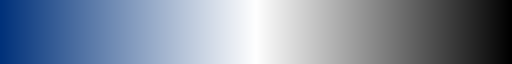

In [5]:

# Create a personal color map 
colors = ["#00317a","#FFF","#000"]
n_bins = 1000
cmap_name = 'custom_colormap'
palette = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
palette

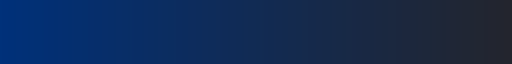

In [6]:
palette_b = sns.dark_palette("#00317a", reverse=True, as_cmap=True)
palette_b

In [7]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#00317a", n_colors=len(df),as_cmap=False)
palette_map

[(0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.13938124775110491, 0.14652229085327886, 0.17972974582003676),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1388346546226692, 0.14670124995873698, 0.1809011247483857),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1382880614942335, 0.1468802090641951, 0.18207250367673466),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1377414683657978, 0.1470591681696532, 0.18324388260508362),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.18441526153343257),
 (0.1371948752373621, 0.14723812727511132, 0.184415261533432

## **1. Description des données**
***

In [8]:
# Describe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [9]:
# View random data
df.sample(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3013,27880,2016,Multifamily MR (5-9),Mid-Rise Multifamily,The Lenawee Apartments,1629 Harvard Avenue,Seattle,WA,98122.0,6003000590,3,EAST,47.61621,-122.32241,1940,1.0,5,50356,0,50356,"Multifamily Housing, Parking",Multifamily Housing,50356.0,Parking,3120.0,NaN,NaN,NaN,99.0,49.700001,54.700001,71.900002,77.500000,2.503804e+06,2752609.250,0.0,139349.90630,475462.0,20283.421880,2028342.0,False,NaN,Compliant,NaN,111.04,2.21
669,19520,2016,NonResidential,Worship Facility,Woodland Park Methodist Church,302 N. 78TH ST,Seattle,WA,98103.0,0091000085,6,NORTHWEST,47.68576,-122.35481,1922,1.0,2,21022,0,21022,Worship Facility,Worship Facility,21022.0,NaN,NaN,NaN,NaN,NaN,54.0,45.000000,51.299999,60.900002,67.599998,9.452456e+05,1078904.000,0.0,40416.89844,137902.0,8073.429688,807343.0,False,NaN,Compliant,NaN,43.84,2.09
1650,22971,2016,Multifamily LR (1-4),Low-Rise Multifamily,LYNNYALE,2245 Yale Ave E,Seattle,WA,98102.0,2902200445,4,LAKE UNION,47.63958,-122.32750,1928,1.0,3,20384,0,20384,Multifamily Housing,Multifamily Housing,20384.0,NaN,NaN,NaN,NaN,NaN,100.0,32.000000,32.700001,52.299999,53.000000,6.531758e+05,666623.125,0.0,53214.19922,181567.0,4716.089844,471609.0,False,NaN,Compliant,NaN,26.31,1.29


In [10]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
Name: count, dtype: int64

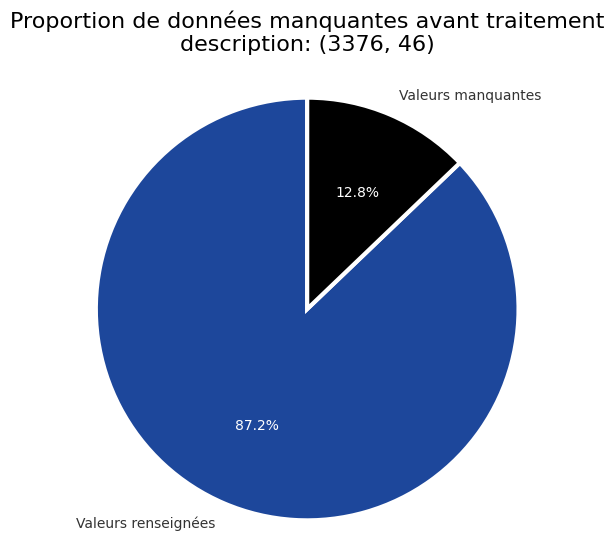

In [11]:
# Calculation of the average percentage of missing values
missing_percentage = df.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Valeurs renseignées", "Valeurs manquantes"]
# Define color code
colors = ["#1d479b",'#000']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title(f"Proportion de données manquantes avant traitement\ndescription: {df.shape}",pad=20,color="#000",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#333", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

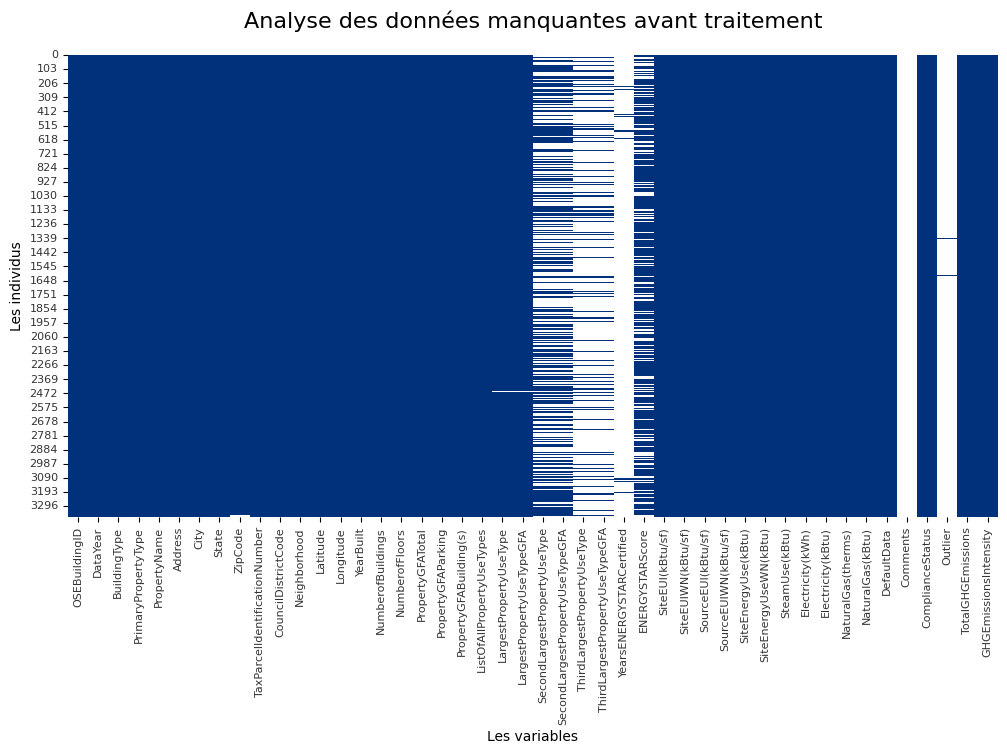

In [12]:
cmap = ["#00317a","#000","#333","#F1F1F1", "#FFF"]
plt.figure(figsize=(12,6))
ax = sns.heatmap(df.isna(), cbar=False, cmap=cmap)
# Set title on pie chart
plt.title(f"Analyse des données manquantes avant traitement",pad=20,color="#000",fontsize=16)
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Les variables",color='#000', fontsize=10)
plt.ylabel("Les individus",color='#000', fontsize=10)
plt.show()

In [13]:
# Information on data quality
print("Nb de colonne sans données: {}".format(df.columns[df.isnull().all()].shape[0]))
print("Nb de lignes sans données : {}".format(df.isna().all(axis=1).sum()))
print("Nb de lignes dupliquées : {}".format(df.duplicated().sum()))
print("Nb d'identifiant uniques dupliqués' : {}".format(df["OSEBuildingID"].duplicated().sum()))

Nb de colonne sans données: 1
Nb de lignes sans données : 0
Nb de lignes dupliquées : 0
Nb d'identifiant uniques dupliqués' : 0


In [14]:
# Taux de valeurs manquantes par colonne
(df.isna().mean().sort_values(ascending=False)*100).head(10)

Comments                           100.000000
Outlier                             99.052133
YearsENERGYSTARCertified            96.475118
ThirdLargestPropertyUseType         82.345972
ThirdLargestPropertyUseTypeGFA      82.345972
SecondLargestPropertyUseType        50.266588
SecondLargestPropertyUseTypeGFA     50.266588
ENERGYSTARScore                     24.970379
LargestPropertyUseTypeGFA            0.592417
LargestPropertyUseType               0.592417
dtype: float64

## **2. Nettoyage des données**
***

Dans un premier temps, il s'agit de supprimer les variables qui ne contiennent pas suffisamment d'informations pour être exploitées. 

### **1. Suppression des données inexploitables**

La colonne `Comments` peut d'ores et déjà être supprimée puisqu'elle ne contient aucune donnée. Ensuite, la colonne `Outlier` contient peu de données mais elle est pertinente car elle informe sur les valeurs abérrantes du jeu de données. Ces données sont isolées dans un premier temps.

In [15]:
# Delete columns containing only null values
df.dropna(axis=1, how="all", inplace=True)

In [16]:
# Instanciation des outliers
df_outliers = df.loc[df["Outlier"].notnull()]

La colonne `YearsENERGYSTARCertified` est trop peu renseignée pour être pertinente dans la suite de l'analyse, elle est donc supprimée. 

Il en va de même pour les colonnes `ThirdLargestPropertyUseType` et `ThirdLargestPropertyUseTypeGFA` qui informe sur le 3ème niveau d'utilisation des bâtiments. Le second niveau d'utilisation manque également de données (50%), c'est donc la première utilisation des bâtiments qui est retenue pour la suite. Les colonnes `SecondLargestPropertyUseType` et `SecondLargestPropertyUseTypeGFA` sont également supprimées.

In [17]:
# Instanciation des colonnes ayant un taux de données manquantes trop élevée
null_columns = ["YearsENERGYSTARCertified",
                "ThirdLargestPropertyUseType","ThirdLargestPropertyUseTypeGFA",
                "SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA"]
# Suppression des colonnes
df = df.drop(columns=null_columns)

### **2. Sélection des variables pertinentes pour la mission**

Le but étant la prédiction des émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation, seule les variables nécessaires à se calcul sont conservées.

In [18]:
df["Prop.Electricity"] = int(df.loc[1,"Electricity(kBtu)"]/df.loc[1,"SiteEnergyUse(kBtu)"]*100)

In [19]:
df["Prop.NaturalGas"] = int(df.loc[1,"NaturalGas(kBtu)"]/df.loc[1,"SiteEnergyUse(kBtu)"]*100)

In [20]:
# Sélection des varibles
df = df.loc[:,['OSEBuildingID','BuildingType','PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood','Latitude','Longitude','YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore','SiteEnergyUseWN(kBtu)','Outlier']]

In [21]:
# Sélection des bâtiments non-résidentiel
df = df.loc[df["BuildingType"].str.lower().str.contains("nonresidential"),:]

In [22]:
# Sélection des données qui n'ont pas de valeurs aberrantes
df = df[df["Outlier"].isnull()]

In [23]:
df = df.drop(columns="Outlier")

In [24]:
df["CouncilDistrictCode"] = df["CouncilDistrictCode"].astype(str)           

## **3. Analyse des données**
***

### **1. Analyse de la target**

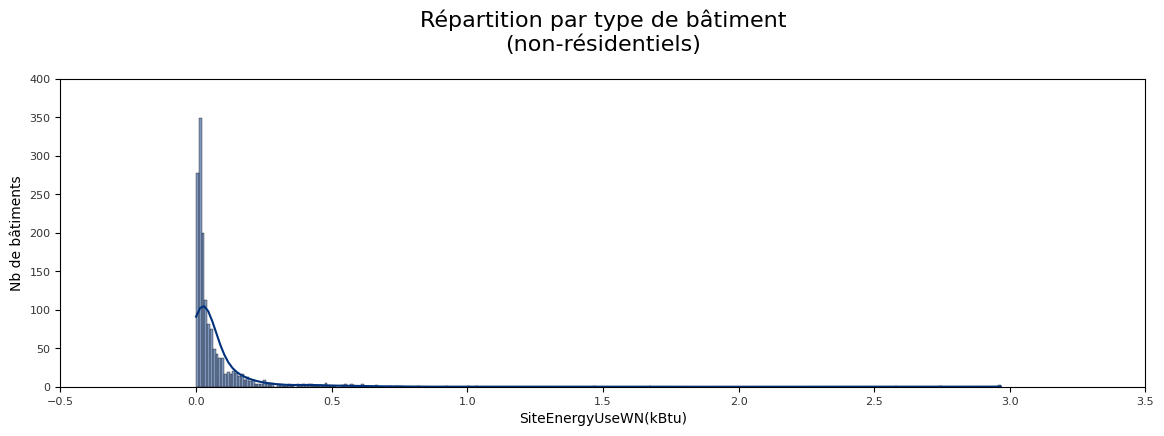

In [25]:
# Observation of zero values (average per column)
plt.figure(figsize=(14,4))
ax = sns.histplot(df["SiteEnergyUseWN(kBtu)"], kde=True, color="#00317a")
plt.title("Répartition par type de bâtiment\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("SiteEnergyUseWN(kBtu)",color='#000', fontsize=10)
plt.ylabel("Nb de bâtiments",color='#000', fontsize=10)
plt.show()

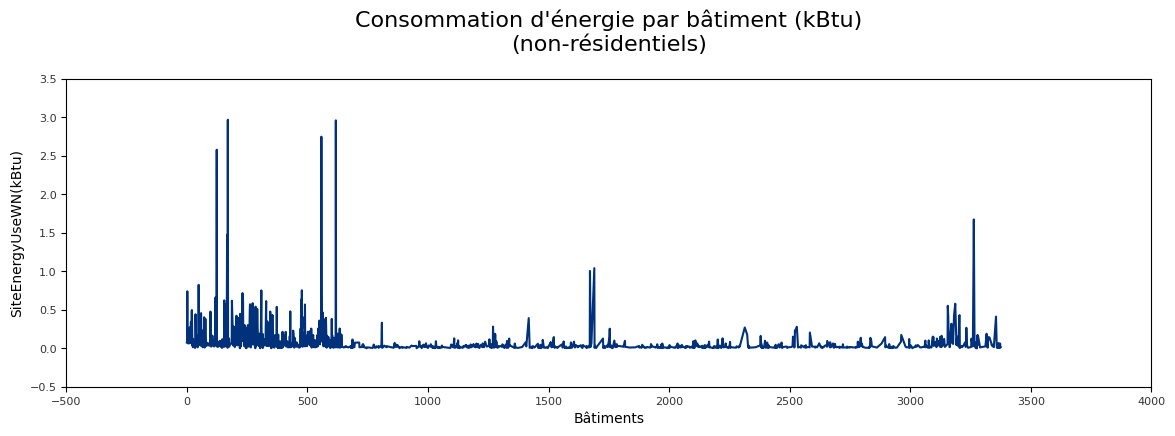

In [26]:
# Observation of zero values (average per column)
plt.figure(figsize=(14,4))
ax = sns.lineplot(df["SiteEnergyUseWN(kBtu)"],color="#00317a")
plt.title("Consommation d'énergie par bâtiment (kBtu)\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Bâtiments",color='#000', fontsize=10)
plt.ylabel("SiteEnergyUseWN(kBtu)",color='#000', fontsize=10)
plt.show()

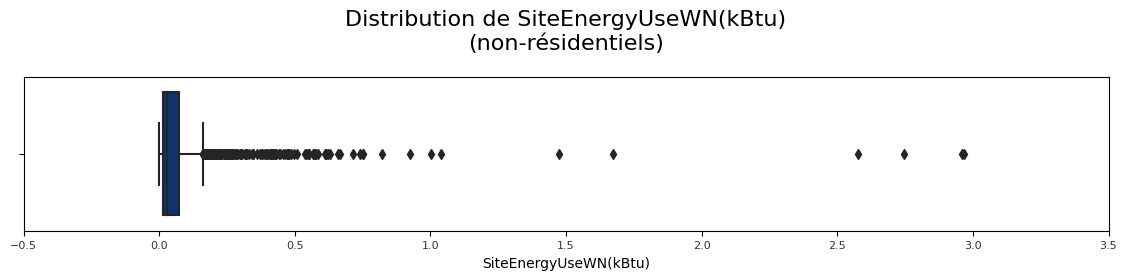

In [27]:
# Observation of zero values (average per column)
plt.figure(figsize=(14,2))
ax = sns.boxplot(df, x="SiteEnergyUseWN(kBtu)", color="#00317a")
plt.title("Distribution de SiteEnergyUseWN(kBtu)\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("SiteEnergyUseWN(kBtu)",color='#000', fontsize=10)
plt.show()

### **2. Visualisation des features**

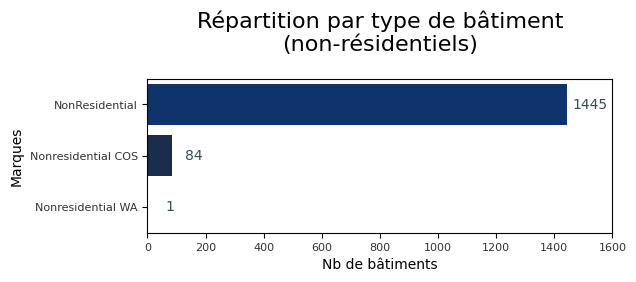

In [28]:
df_food_marques = df[["OSEBuildingID","BuildingType"]].groupby(by=["BuildingType"]).count().sort_values(by="OSEBuildingID", ascending=False).reset_index()

# Colour palette for the various graphics
palette_map = reversed(sns.color_palette("dark:#00317a", n_colors=len(df_food_marques),as_cmap=False))

# Observation of zero values (average per column)
plt.figure(figsize=(6,2))
ax = sns.barplot(data=df_food_marques,x="OSEBuildingID",y="BuildingType",palette=palette_map)
plt.title("Répartition par type de bâtiment\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Add the values to the bar plot
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(16, 0), textcoords='offset points', color="#384B52")

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Nb de bâtiments",color='#000', fontsize=10)
plt.ylabel("Marques",color='#000', fontsize=10)
plt.show()

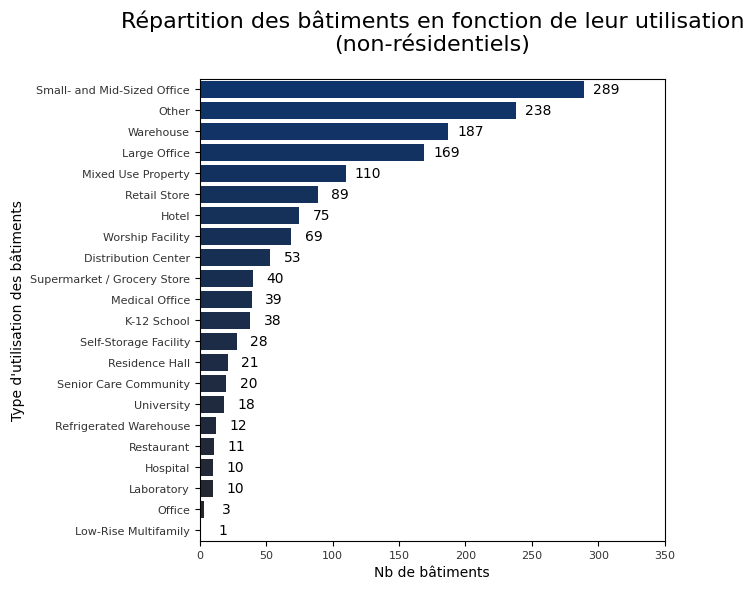

In [29]:
df_food_marques = df[["OSEBuildingID","PrimaryPropertyType"]].groupby(by=["PrimaryPropertyType"]).count().sort_values(by="OSEBuildingID", ascending=False).reset_index()

# Colour palette for the various graphics
palette_map = reversed(sns.color_palette("dark:#00317a", n_colors=len(df_food_marques),as_cmap=False))

# Observation of zero values (average per column)
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df_food_marques,x="OSEBuildingID",y="PrimaryPropertyType",palette=palette_map)
plt.title("Répartition des bâtiments en fonction de leur utilisation\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Add the values to the bar plot
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(16, 0), textcoords='offset points', color="#000")

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Nb de bâtiments",color='#000', fontsize=10)
plt.ylabel("Type d'utilisation des bâtiments",color='#000', fontsize=10)
plt.show()

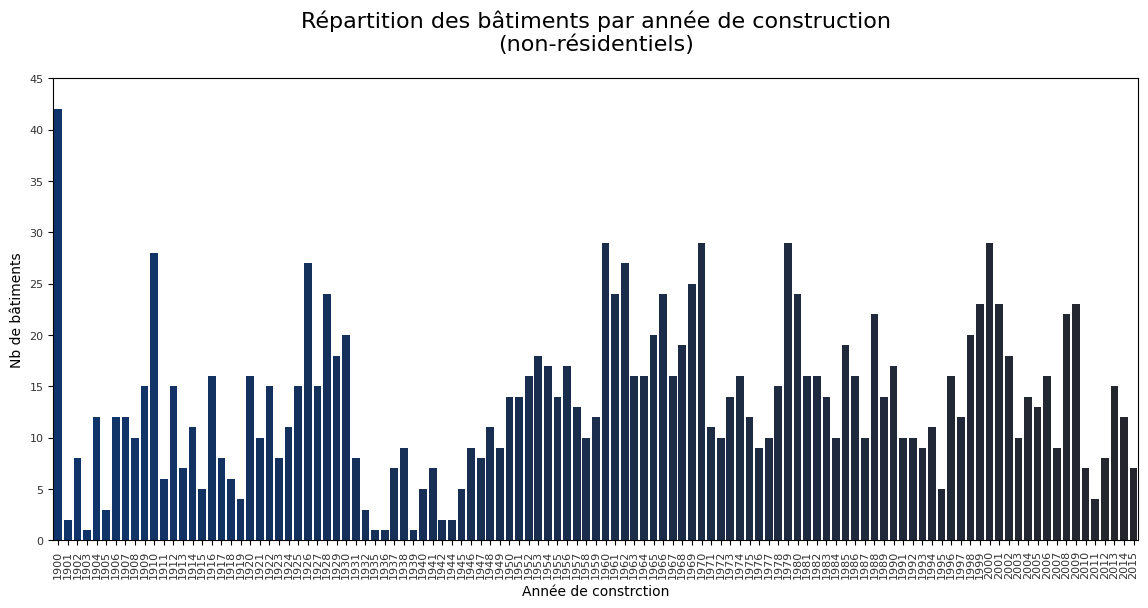

In [30]:
df_food_marques = df[["OSEBuildingID","YearBuilt"]].groupby(by=["YearBuilt"]).count().sort_values(by="OSEBuildingID", ascending=False).reset_index()

# Colour palette for the various graphics
palette_map = reversed(sns.color_palette("dark:#00317a", n_colors=len(df_food_marques),as_cmap=False))

# Observation of zero values (average per column)
plt.figure(figsize=(14,6))
ax = sns.barplot(data=df_food_marques,x="YearBuilt",y="OSEBuildingID",palette=palette_map)
plt.title("Répartition des bâtiments par année de construction\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8, rotation=90)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Année de constrction",color='#000', fontsize=10)
plt.ylabel("Nb de bâtiments",color='#000', fontsize=10)
plt.show()

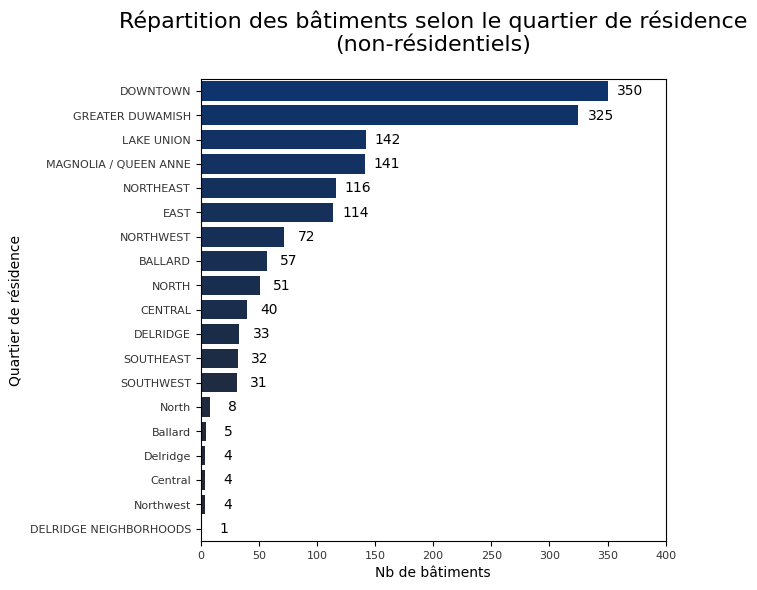

In [31]:
df_food_marques = df[["OSEBuildingID","Neighborhood"]].groupby(by=["Neighborhood"]).count().sort_values(by="OSEBuildingID", ascending=False).reset_index()

# Colour palette for the various graphics
palette_map = reversed(sns.color_palette("dark:#00317a", n_colors=len(df_food_marques),as_cmap=False))

# Observation of zero values (average per column)
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df_food_marques,x="OSEBuildingID",y="Neighborhood",palette=(palette_map))
plt.title("Répartition des bâtiments selon le quartier de résidence\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Add the values to the bar plot
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(16, 0), textcoords='offset points', color="#000")

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Nb de bâtiments",color='#000', fontsize=10)
plt.ylabel("Quartier de résidence",color='#000', fontsize=10)
plt.show()

### **3. Visualisation des relations features-target**

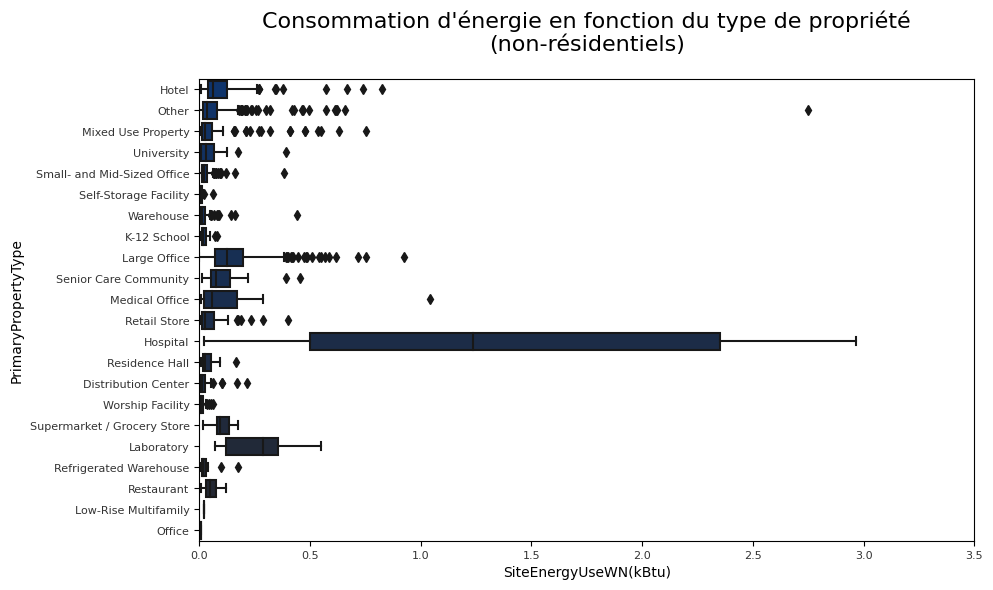

In [32]:
# Colour palette for the various graphics
palette_map = reversed(sns.color_palette("dark:#00317a", n_colors=len(df["PrimaryPropertyType"].unique()),as_cmap=False))

# Observation of zero values (average per column)
plt.figure(figsize=(10,6))
ax = sns.boxplot(df, x="SiteEnergyUseWN(kBtu)", y="PrimaryPropertyType",palette=(palette_map))
plt.title("Consommation d'énergie en fonction du type de propriété\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("SiteEnergyUseWN(kBtu)",color='#000', fontsize=10)
plt.ylabel("PrimaryPropertyType",color='#000', fontsize=10)

# Set x axis to start from 0
ax.set_xlim(left=0)

plt.show()

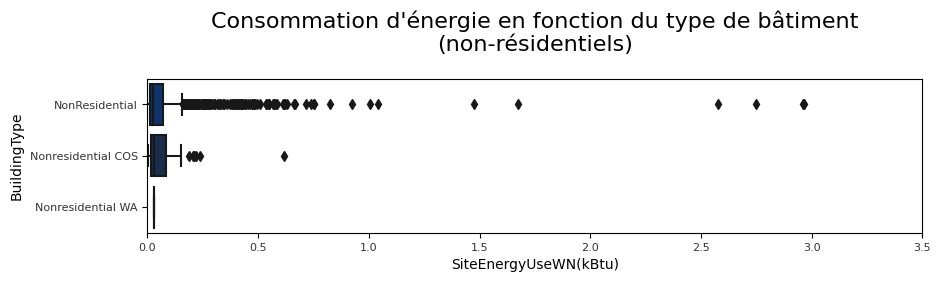

In [33]:
# Colour palette for the various graphics
palette_map = reversed(sns.color_palette("dark:#00317a", n_colors=len(df["BuildingType"].unique()),as_cmap=False))

# Observation of zero values (average per column)
plt.figure(figsize=(10,2))
ax = sns.boxplot(df, x="SiteEnergyUseWN(kBtu)", y="BuildingType",palette=(palette_map))
plt.title("Consommation d'énergie en fonction du type de bâtiment\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("SiteEnergyUseWN(kBtu)",color='#000', fontsize=10)
plt.ylabel("BuildingType",color='#000', fontsize=10)

# Set x axis to start from 0
ax.set_xlim(left=0)

plt.show()

Voir ce que donne un groupeby quartier .mediane pour observer l'effet et le résultat

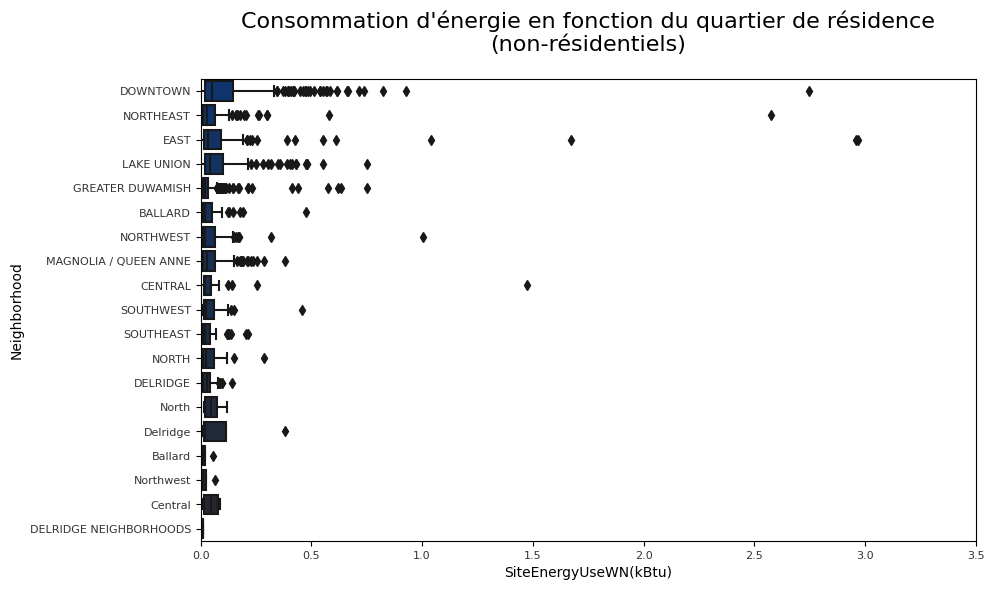

In [34]:
# Colour palette for the various graphics
palette_map = reversed(sns.color_palette("dark:#00317a", n_colors=len(df["Neighborhood"].unique()),as_cmap=False))

# Observation of zero values (average per column)
plt.figure(figsize=(10,6))
ax = sns.boxplot(df, x="SiteEnergyUseWN(kBtu)", y="Neighborhood",palette=(palette_map))#Showflyer=false
plt.title("Consommation d'énergie en fonction du quartier de résidence\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("SiteEnergyUseWN(kBtu)",color='#000', fontsize=10)
plt.ylabel("Neighborhood",color='#000', fontsize=10)

# Set x axis to start from 0
ax.set_xlim(left=0)

plt.show()

In [35]:
# Convertissez la colonne en datetime en spécifiant le format de l'année
df.loc[:,"YearBuilt"] = pd.to_datetime(df["YearBuilt"], format='%Y',errors='coerce')

Faire un  graph pour les consommation en fonction de la surface du bâtiment

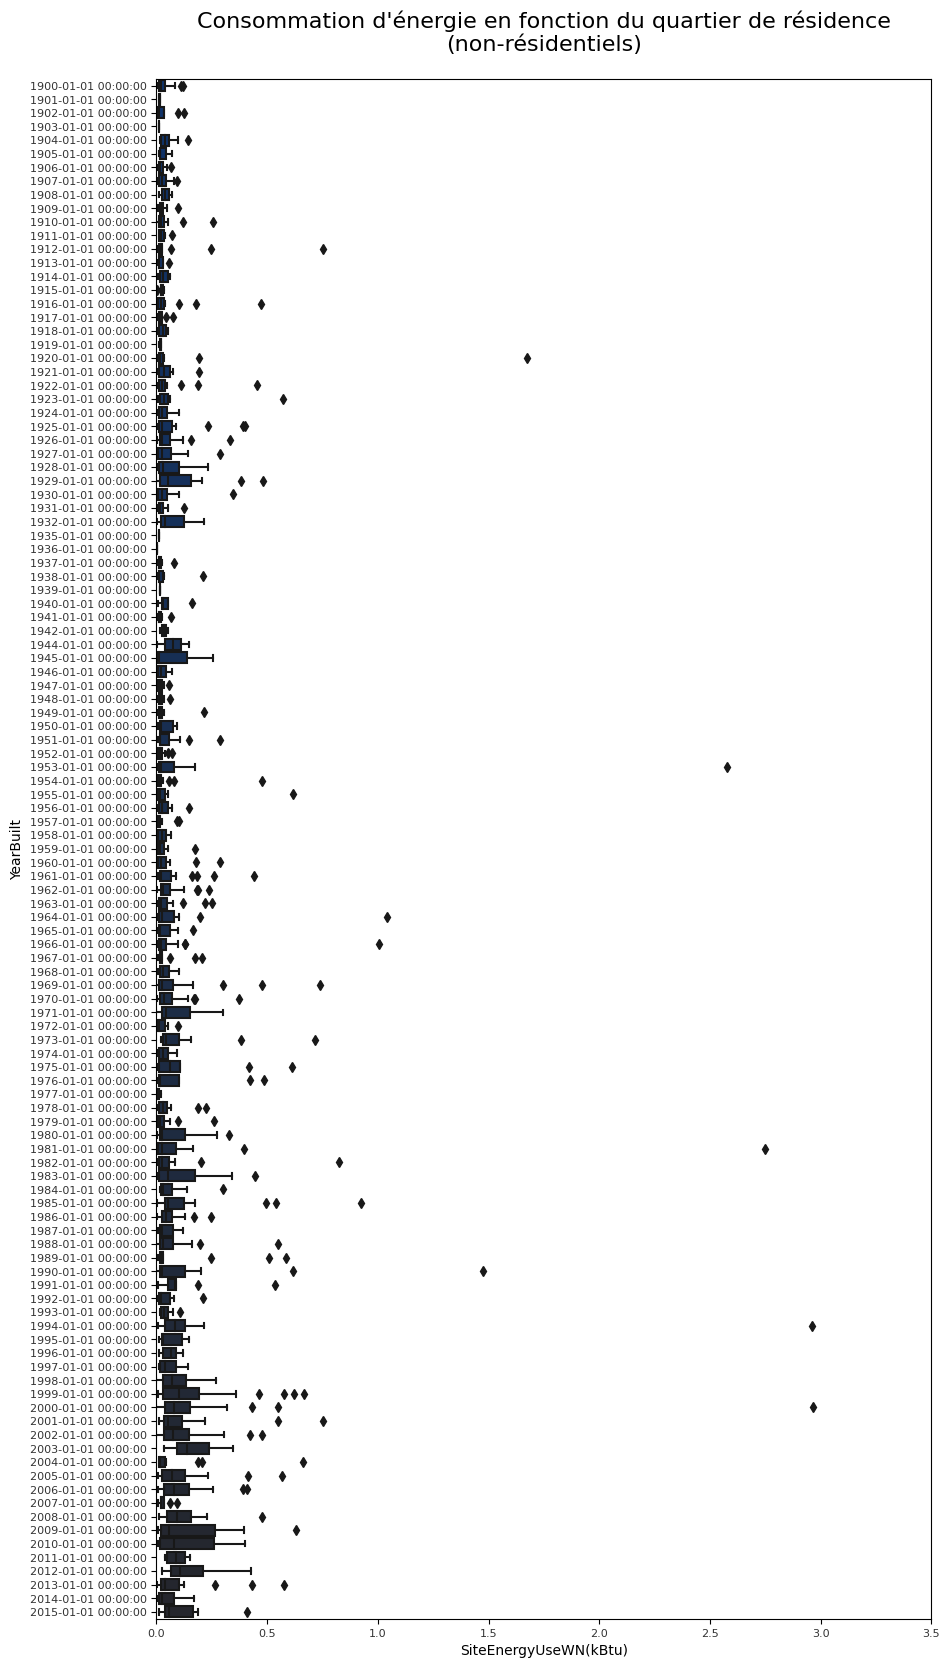

In [36]:
# Colour palette for the various graphics
palette_map = reversed(sns.color_palette("dark:#00317a", n_colors=len(df["YearBuilt"].unique()),as_cmap=False))
df_year = df.sort_values(by="YearBuilt")
# Observation of zero values (average per column)
plt.figure(figsize=(10,20))
ax = sns.boxplot(df_year, x="SiteEnergyUseWN(kBtu)", y="YearBuilt",palette=(palette_map))
plt.title("Consommation d'énergie en fonction du quartier de résidence\n(non-résidentiels)",pad=20,color="#000",fontsize=16)

# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#333', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#333', fontsize=8)
# Customise x and y axis labels
plt.xlabel("SiteEnergyUseWN(kBtu)",color='#000', fontsize=10)
plt.ylabel("YearBuilt",color='#000', fontsize=10)

# Set x axis to start from 0
ax.set_xlim(left=0)

plt.show()

In [37]:
df_corr = df.select_dtypes(include=['float64', 'int64']).drop(columns=["Latitude","Longitude"])

Penser a supprimer OSEBuildingID

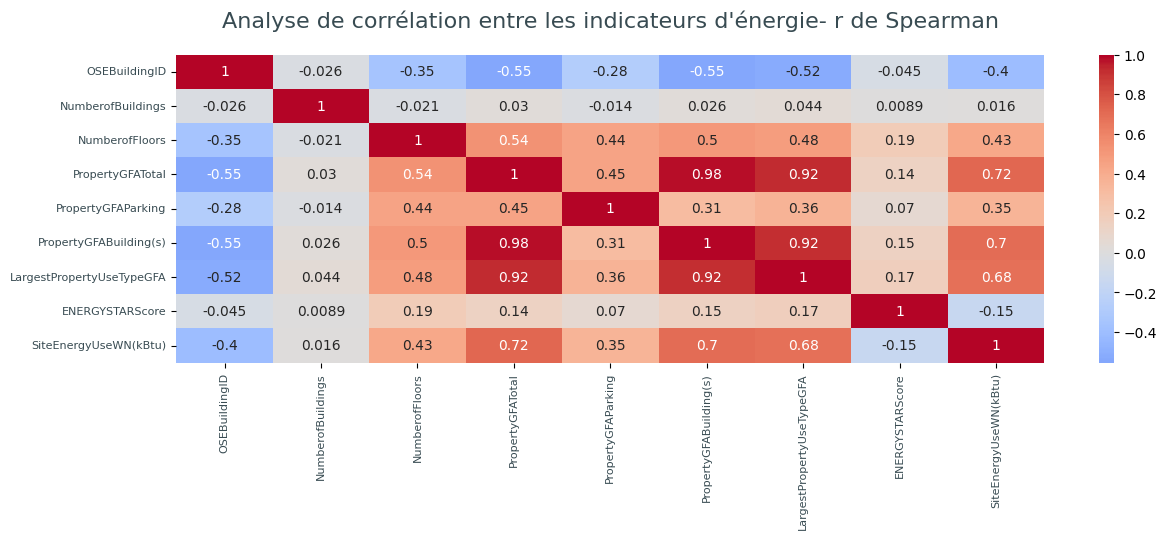

In [38]:
#Analysis of correlations between variables
plt.figure(figsize=(14,4))
ax = sns.heatmap(df_corr.corr(method="spearman"), center=0, cmap="coolwarm", annot=True)
ax.set_title('Analyse de corrélation entre les indicateurs d\'énergie- r de Spearman',pad=20,color="#384B52",fontsize=16)
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
plt.show()

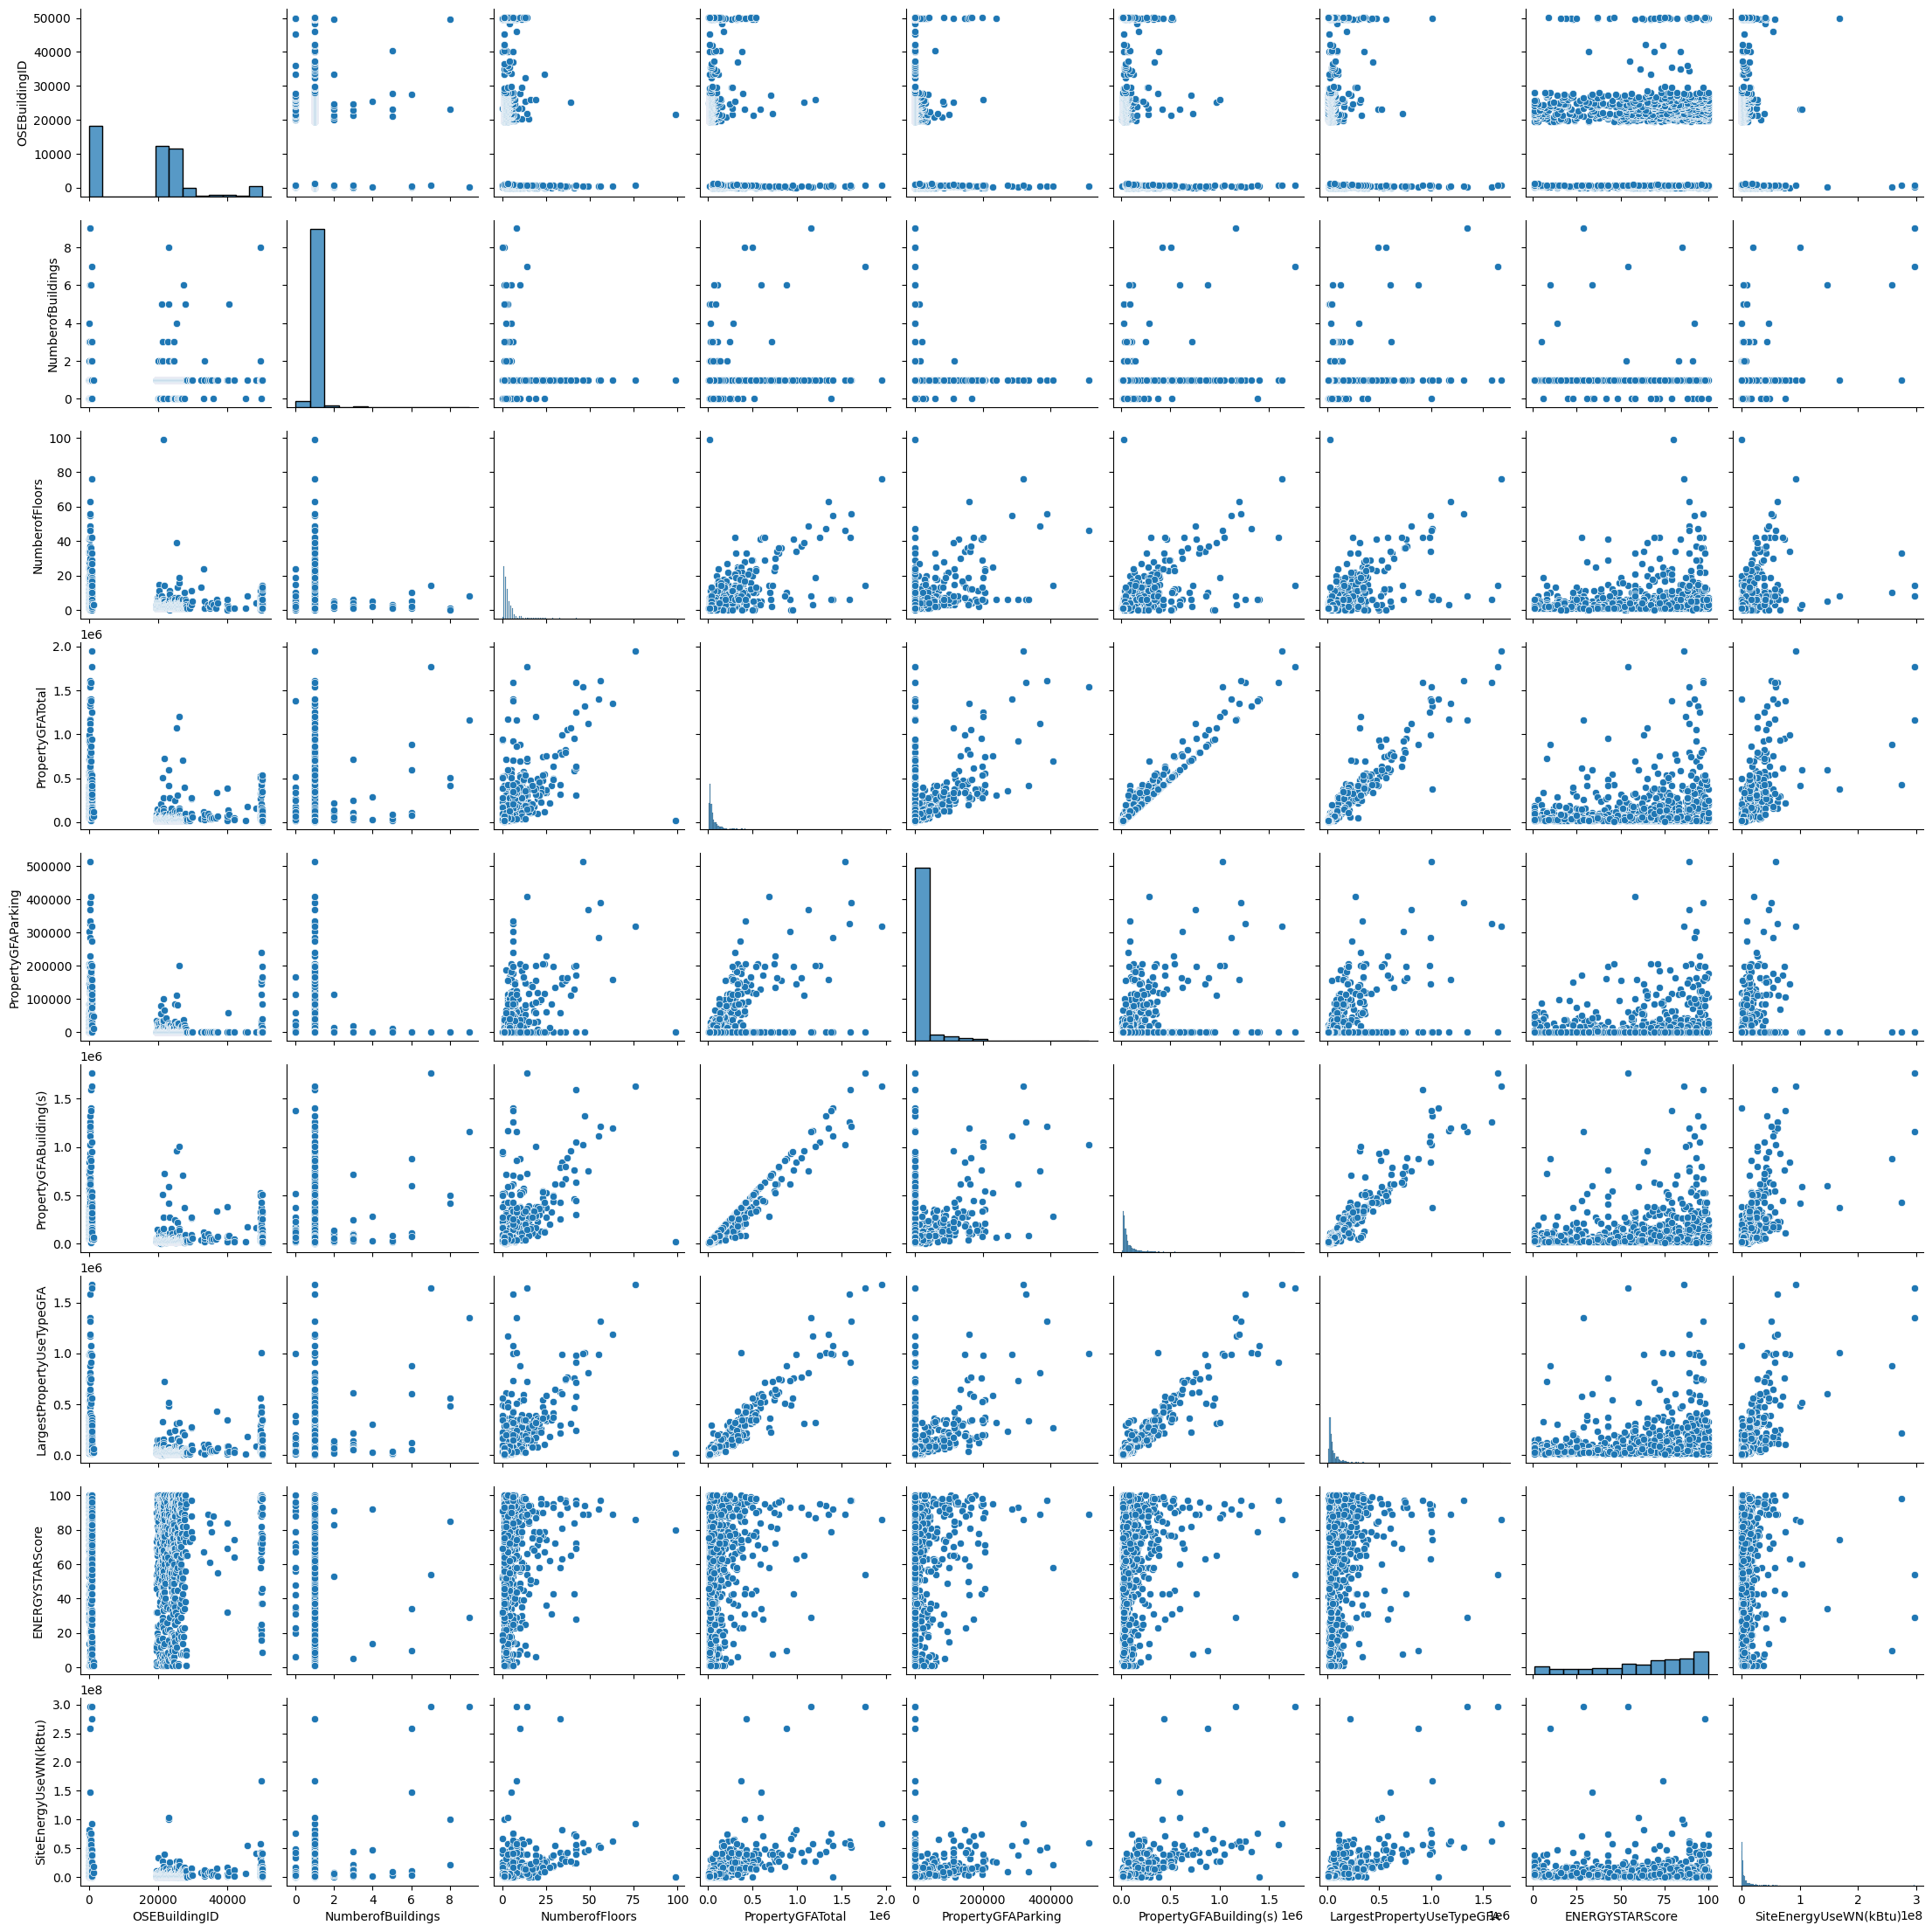

In [39]:
sns.pairplot(df_corr)

In [40]:
df.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P4_Anticipez_Les_Besoins_En_Consommation_De_Bâtiments/2016_final_data.csv", sep=",")

Utiliser Geopandas pour certaines représentations.

hyperopt, optuna -> 